In [1]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

import re
import funciones as fn

import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df

In [2]:
#Leemos los archivos
estadio = pd.read_csv(r'../data/stadiums.csv')
match = pd.read_csv(r'../data/matches.csv')
team = pd.read_csv(r'../data/teams.csv')
player = pd.read_csv(r'../data/players.csv')

### LIMPIAMOS ESTADIO

In [3]:
estadio.head()

,Unnamed: 0,Estadio,Capacidad,Equipo
0,0,Camp Nou,"99,354",Barcelona
1,1,Santiago Bernabeu,81.044,Real Madrid
2,2,Estadio Metropolitano,68.456,Atletico Madrid
3,3,Benito Villamarín,60.721,Real Betis
4,4,Lluís Companys,"60,713",FC Penger


In [4]:
estadio.columns = ['Id', 'Estadio', 'Capacidad', 'Equipo']

In [5]:
estadio.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         66 non-null     int64 
 1   Estadio    66 non-null     object
 2   Capacidad  66 non-null     object
 3   Equipo     66 non-null     object
dtypes: int64(1), object(3)
memory usage: 14.6 KB


In [6]:
lista=[]
for x in estadio.Capacidad:
    x = x.replace('.', '').replace(',', '')
    x = int(x)
    lista.append(x)
estadio.Capacidad = lista
estadio.head()

,Id,Estadio,Capacidad,Equipo
0,0,Camp Nou,99354,Barcelona
1,1,Santiago Bernabeu,81044,Real Madrid
2,2,Estadio Metropolitano,68456,Atletico Madrid
3,3,Benito Villamarín,60721,Real Betis
4,4,Lluís Companys,60713,FC Penger


In [7]:
estadio.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         66 non-null     int64 
 1   Estadio    66 non-null     object
 2   Capacidad  66 non-null     int64 
 3   Equipo     66 non-null     object
dtypes: int64(2), object(2)
memory usage: 11.1 KB


'N nan cols: 0'

Series([], dtype: float64)

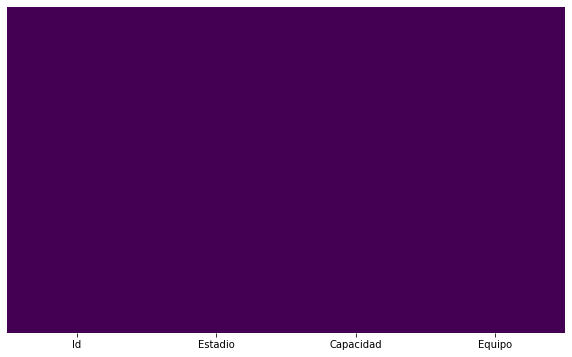

In [8]:
fn.check_nan(estadio)

In [10]:
fn.check_value(estadio, estadio.columns) 

0     1
49    1
35    1
36    1
37    1
Name: Id, dtype: int64
Camp Nou                  1
Montilivi                 1
Carlos Belmonte           1
Coliseum Alfonso Pérez    1
El Helmántico             1
Name: Estadio, dtype: int64
10000    3
81044    1
19336    1
17524    1
17393    1
Name: Capacidad, dtype: int64
Barcelona       1
Girona          1
Albacete        1
Getafe          1
Salamanca CF    1
Name: Equipo, dtype: int64


In [14]:
fn.check_unique(estadio, estadio.columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
['Camp Nou' 'Santiago Bernabeu' 'Estadio Metropolitano'
 'Benito Villamarín' 'Lluís Companys' 'La Cartuja' 'San Mamés' 'Mestalla'
 'Ramón Sánchez Pizjuán' 'Estadio RCDE' 'Anoeta' 'Martínez Valero'
 'La Romareda' 'Abanca Riazor' 'Gran Canaria' 'Nueva Condomina'
 'Carlos Tartiere' 'La Rosaleda' 'José Rico Pérez' 'El Molinón' 'Balaídos'
 'José Zorrilla' 'Ciutat de Valencia' 'Ramón de Carranza' 'El Sadar'
 'Estadio de la Cerámica' 'Son Moix' 'Heliodoro Rodríguez López'
 'El Sardinero' 'Nuevo Colombino' 'Estadio del Mediterráneo'
 'Nuevo Arcángel' 'Chapín' 'Mendizorrotza' 'Los Cármenes'
 'Carlos Belmonte' 'Coliseum Alfonso Pérez' 'El Helmántico'
 'Municipal La Línea' 'Estadio Las Gaunas' 'Nuevo Vivero' 'Cartagonova'
 'Romano' 'Nou Estadi' 'Vallecas' 'Castalia' 'El Soto' "Camp d'esports"
 'Jua

In [16]:
estadio.duplicated().any() #No hay duplicados

False

In [ ]:
estadio.tail() #Limpios

### LIMPIAMOS TEAM

In [11]:
team.tail()

,Unnamed: 0,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK
37,37,Sporting Gijón,26,27.4,45.3,15,165,"1,350",15.0,19,13,19,0,0,31,0,1.27,0.87,2.13,1.27,2.13
38,38,Tenerife,28,28.6,46.5,15,165,"1,350",15.0,14,9,11,3,3,40,4,0.93,0.60,1.53,0.73,1.33
39,39,UD Ibiza,26,26.7,48.8,15,165,"1,350",15.0,10,8,9,1,1,45,2,0.67,0.53,1.20,0.60,1.13
40,40,Villarreal B,27,22.2,50.1,15,165,"1,350",15.0,19,14,18,1,1,36,1,1.27,0.93,2.20,1.20,2.13
41,41,Zaragoza,25,27.1,53.1,15,165,"1,350",15.0,9,8,9,0,0,40,2,0.60,0.53,1.13,0.60,1.13


In [12]:
team.columns = ['Id', 'Team', 'Pl', 'Age', 'Poss', 'Pj', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'GNP', 'GP', 'PS', 'CrdY', 'CrdR', 'Gls/Pj',
       'Ast/Pj', 'G+A', 'GNP/Pj', 'G+A-P/Pj']

In [13]:
team.tail()

,Id,Team,Pl,Age,Poss,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
37,37,Sporting Gijón,26,27.4,45.3,15,165,"1,350",15.0,19,13,19,0,0,31,0,1.27,0.87,2.13,1.27,2.13
38,38,Tenerife,28,28.6,46.5,15,165,"1,350",15.0,14,9,11,3,3,40,4,0.93,0.60,1.53,0.73,1.33
39,39,UD Ibiza,26,26.7,48.8,15,165,"1,350",15.0,10,8,9,1,1,45,2,0.67,0.53,1.20,0.60,1.13
40,40,Villarreal B,27,22.2,50.1,15,165,"1,350",15.0,19,14,18,1,1,36,1,1.27,0.93,2.20,1.20,2.13
41,41,Zaragoza,25,27.1,53.1,15,165,"1,350",15.0,9,8,9,0,0,40,2,0.60,0.53,1.13,0.60,1.13


In [18]:
team.info(memory_usage='deep') #Min a Int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        42 non-null     int64  
 1   Team      42 non-null     object 
 2   Pl        42 non-null     int64  
 3   Age       42 non-null     float64
 4   Poss      42 non-null     float64
 5   Pj        42 non-null     int64  
 6   Starts    42 non-null     int64  
 7   Min       42 non-null     object 
 8   90s       42 non-null     float64
 9   Gls       42 non-null     int64  
 10  Ast       42 non-null     int64  
 11  GNP       42 non-null     int64  
 12  GP        42 non-null     int64  
 13  PS        42 non-null     int64  
 14  CrdY      42 non-null     int64  
 15  CrdR      42 non-null     int64  
 16  Gls/Pj    42 non-null     float64
 17  Ast/Pj    42 non-null     float64
 18  G+A       42 non-null     float64
 19  GNP/Pj    42 non-null     float64
 20  G+A-P/Pj  42 non-null     float64


In [22]:
lista= []
for x in team.Min:
    x = x.replace(',', '')
    x = int(x)
    lista.append(x)
team.Min = lista
team.head()

,Id,Team,Pl,Age,Poss,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Almería,26,26.5,45.1,14,154,1260,14.0,16,12,16,0,0,47,3,1.14,0.86,2.00,1.14,2.00
1,1,Athletic Club,25,27.9,52.4,14,154,1260,14.0,23,17,21,2,3,23,1,1.64,1.21,2.86,1.50,2.71
2,2,Atlético Madrid,23,29.0,49.8,14,154,1260,14.0,20,16,20,0,0,43,2,1.43,1.14,2.57,1.43,2.57
3,3,Barcelona,25,26.5,64.3,14,154,1260,14.0,33,23,33,0,1,33,3,2.36,1.64,4.00,2.36,4.00
4,4,Betis,27,28.8,50.1,14,154,1260,14.0,16,9,13,3,3,33,7,1.14,0.64,1.79,0.93,1.57


'N nan cols: 0'

Series([], dtype: float64)

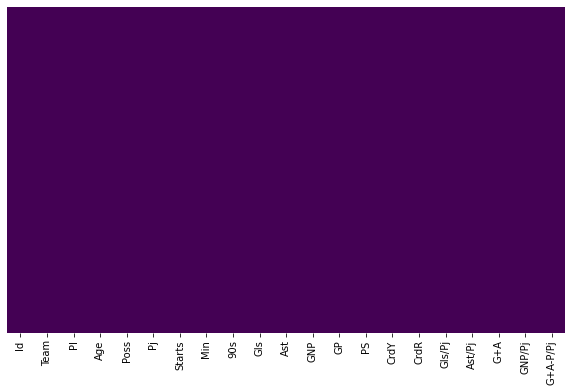

In [23]:
fn.check_nan(team)

In [24]:
fn.check_value(team, team.columns) 

0     1
31    1
23    1
24    1
25    1
Name: Id, dtype: int64
Almería        1
Levante        1
Burgos         1
Cartagena      1
CD Mirandés    1
Name: Team, dtype: int64
26    10
25     9
23     7
24     5
27     4
Name: Pl, dtype: int64
26.5    3
28.8    3
27.7    3
26.7    2
26.6    2
Name: Age, dtype: int64
50.1    2
46.5    2
58.0    2
53.9    2
45.1    1
Name: Poss, dtype: int64
15    22
14    20
Name: Pj, dtype: int64
165    22
154    20
Name: Starts, dtype: int64
1350    22
1260    20
Name: Min, dtype: int64
15.0    22
14.0    20
Name: 90s, dtype: int64
16    5
14    5
13    5
19    5
17    4
Name: Gls, dtype: int64
9     8
12    5
10    5
11    4
14    3
Name: Ast, dtype: int64
13    6
12    5
15    5
11    5
14    4
Name: GNP, dtype: int64
0    11
1    11
2     9
3     7
4     4
Name: GP, dtype: int64
2    11
1    10
0     7
3     7
5     3
Name: PS, dtype: int64
43    4
36    3
40    3
31    3
32    3
Name: CrdY, dtype: int64
3    11
2    10
1     7
4     6
0     3
Name: C

In [25]:
fn.check_unique(team, team.columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
['Almería' 'Athletic Club' 'Atlético Madrid' 'Barcelona' 'Betis' 'Cádiz'
 'Celta Vigo' 'Elche' 'Espanyol' 'Getafe' 'Girona' 'Mallorca' 'Osasuna'
 'Rayo Vallecano' 'Real Madrid' 'Real Sociedad' 'Sevilla' 'Valencia'
 'Valladolid' 'Villarreal' 'Alavés' 'Albacete' 'Andorra' 'Burgos'
 'Cartagena' 'CD Mirandés' 'Eibar' 'Granada' 'Huesca' 'Las Palmas'
 'Leganés' 'Levante' 'Lugo' 'Málaga' 'Oviedo' 'Ponferradina' 'Racing Sant'
 'Sporting Gijón' 'Tenerife' 'UD Ibiza' 'Villarreal B' 'Zaragoza']
[26 25 23 27 21 24 22 28 31]
[26.5 27.9 29.  28.8 29.3 27.7 28.1 28.3 28.5 27.8 26.1 29.4 24.4 26.6
 27.  25.7 27.3 30.9 24.  28.6 28.4 29.2 27.6 30.5 28.  26.7 27.4 22.2
 27.1]
[45.1 52.4 49.8 64.3 50.1 40.6 51.5 43.4 42.5 39.  52.7 41.2 46.1 53.9
 58.  56.  54.4 48.2 52.8 44.6 51.9 65.8 41.3 48.9 53.3 54.2 41.1 65.5
 52.9 51.2 41.9 55.5 46.5 50.7 37.9 45.3 48.8 53.1]
[14 15]
[1